# DATA UNDERSTANDING

**Dataset e commerce customer insight** merupakan dataset yang berisi informasi penjualan berbagai jenis kategori product (sumber : https://www.kaggle.com/datasets/nhiyen/sales-data-fy-2020-2021?utm_source=google)

---

**Informasi Dataset e commerce customer**
* order_id → ID unik untuk setiap transaksi/order.
* order_date → Tanggal terjadinya order.
* status → Status order (misalnya: complete, canceled, order_refunded,received).
* item_id → ID unik untuk item/produk yang dipesan.
* qty_order → Jumlah produk yang dipesan (kuantitas).
* price → Harga satuan produk.
* value → Nilai total sebelum diskon (price × qty_order).
* discount → Nilai potongan harga/diskon.
* total → Nilai akhir setelah diskon diterapkan.
* category → Kategori produk (misalnya: Mobiles, Beauty, Appliance, Entertainment).
* payment_method → Metode pembayaran yang digunakan (misalnya: Easypay, COD, Voucher).
* cust_id → ID unik pelanggan.
* year → Tahun transaksi.
* month → Bulan transaksi.
* Gender → Jenis kelamin pelanggan.
* age → Usia pelanggan.
* full_name → Nama lengkap pelanggan.
* Customer Since → Tanggal pertama kali pelanggan terdaftar/bertransaksi.
* Place Name → Nama area/wilayah tempat pelanggan tinggal.
* County → Nama county/kabupaten.
* City → Kota pelanggan.
* State → Negara bagian (misalnya: NY, IL, OH).
* Region → Wilayah (Northeast, South, Midwest, West).
* Discount_Percent → Persentase diskon yang diberikan terhadap nilai order.

---

**Variable utama yang digunakan untuk Analisis Segemntation RFM**

1. Recency (seberapa baru pelanggan belanja)
> `purchase_frequency`

2. Frequency (seberapa banyak/sering belanja)
> `quantity`

3. Monitory (seberapa banyak uang yang dibelanjakan)
> `unit_price` x `quantity`


---

**Objective Analysis**
> Melakukan Analysis Segmentation Customer menggunakan RFM Analysist untuk menentukan segment yang memberikan revenue yang signifikan terhadap perusahaan serta dapat bemberikan rekomendasi untuk meningkatkan pendapatan perusahaan berdasarkan behavior dari transaksi customer




# DATASET FOR ANALYSIS

In [1]:
#Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#tampilkan kolom secara maksimal
pd.set_option('display.max_columns', None)

In [2]:
dataku = pd.read_csv('sales_06_FY2020-21.csv', encoding='utf-8')
dataku

/tmp/ipython-input-2012853840.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dataku = pd.read_csv('sales_06_FY2020-21.csv', encoding='utf-8')


,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,cust_id,year,month,ref_num,Name Prefix,First Name,Middle Initial,Last Name,Gender,age,full_name,E Mail,Customer Since,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,2020-10-01,received,574772.0,oasis_Oasis-064-36,21.0,89.9,1798.0,0.0,1798.0,Men's Fashion,cod,Valid,60124.0,2020,Oct-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,2020-10-01,received,574774.0,Fantastic_FT-48,11.0,19.0,190.0,0.0,190.0,Men's Fashion,cod,Valid,60124.0,2020,Oct-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,2020-10-01,complete,574777.0,mdeal_DMC-610-8,9.0,149.9,1199.2,0.0,1199.2,Men's Fashion,cod,Net,60124.0,2020,Oct-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,2020-10-01,complete,574779.0,oasis_Oasis-061-36,9.0,79.9,639.2,0.0,639.2,Men's Fashion,cod,Net,60124.0,2020,Oct-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,2020-11-13,received,595185.0,MEFNAR59C38B6CA08CD,2.0,99.9,99.9,0.0,99.9,Men's Fashion,cod,Valid,60124.0,2020,Nov-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286387,100562365,2021-09-30,paid,905179.0,APPCHA5AF14939B8F8A,2.0,4419.9,4419.9,0.0,4419.9,Appliances,Easypay,Valid,115323.0,2021,Sep-2021,967309,Prof.,Brady,K,Latham,M,51.0,"Latham, Brady",brady.latham@gmail.com,3/21/2007,613-87-0361,212-772-7404,Rushville,Yates,Rushville,NY,14544,Northeast,bklatham,0.0
286388,100562376,2021-09-30,cod,905191.0,MEFCOT5A8D1E973B886,2.0,39.9,39.9,0.0,39.9,Men's Fashion,cod,Valid,115324.0,2021,Sep-2021,335358,Prof.,Bennie,M,Brunetti,M,52.0,"Brunetti, Bennie",bennie.brunetti@gmail.com,10/24/2011,101-02-1040,229-817-9451,Lawrenceville,Gwinnett,Lawrenceville,GA,30044,South,bmbrunetti,0.0
286389,100562383,2021-09-30,cod,905200.0,WOFVAL59D5EA84167F9-M,2.0,40.0,40.0,0.0,40.0,Women's Fashion,cod,Valid,115325.0,2021,Sep-2021,675384,Mrs.,Francesca,N,Giusti,F,38.0,"Giusti, Francesca",francesca.giusti@btinternet.com,7/25/1987,399-31-7238,252-414-8396,Durham,Durham,Durham,NC,27701,South,fngiusti,0.0
286390,100562384,2021-09-30,cod,905202.0,WOFNIG5B4D7EB0E9FDD-L,2.0,49.9,49.9,0.0,49.9,Women's Fashion,cod,Valid,115325.0,2021,Sep-2021,675384,Mrs.,Francesca,N,Giusti,F,38.0,"Giusti, Francesca",francesca.giusti@btinternet.com,7/25/1987,399-31-7238,252-414-8396,Durham,Durham,Durham,NC,27701,South,fngiusti,0.0


In [3]:
dataku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  float64
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  float64
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  float64
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

In [4]:
# filter transaksi valid untuk revenue calculations (adjust status)
valid_status = ['complete', 'received']
dataku['is_valid_order'] = dataku['status'].isin(valid_status)
dataku.head(10)

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,cust_id,year,month,ref_num,Name Prefix,First Name,Middle Initial,Last Name,Gender,age,full_name,E Mail,Customer Since,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent,is_valid_order
0,100354678,2020-10-01,received,574772.0,oasis_Oasis-064-36,21.0,89.9,1798.0,0.0,1798.0,Men's Fashion,cod,Valid,60124.0,2020,Oct-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,True
1,100354678,2020-10-01,received,574774.0,Fantastic_FT-48,11.0,19.0,190.0,0.0,190.0,Men's Fashion,cod,Valid,60124.0,2020,Oct-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,True
2,100354680,2020-10-01,complete,574777.0,mdeal_DMC-610-8,9.0,149.9,1199.2,0.0,1199.2,Men's Fashion,cod,Net,60124.0,2020,Oct-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,True
3,100354680,2020-10-01,complete,574779.0,oasis_Oasis-061-36,9.0,79.9,639.2,0.0,639.2,Men's Fashion,cod,Net,60124.0,2020,Oct-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,True
4,100367357,2020-11-13,received,595185.0,MEFNAR59C38B6CA08CD,2.0,99.9,99.9,0.0,99.9,Men's Fashion,cod,Valid,60124.0,2020,Nov-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,True
5,100367357,2020-11-13,received,595186.0,MEFBUY59B7C3DDC2CA3-42,2.0,39.9,39.9,0.0,39.9,Men's Fashion,cod,Valid,60124.0,2020,Nov-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,True
6,100367360,2020-11-13,order_refunded,595192.0,MATDAN59C3C845B38F0,2.0,47.6,47.6,0.0,47.6,Mobiles & Tablets,cod,Valid,60124.0,2020,Nov-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,False
7,100354677,2020-10-01,canceled,574769.0,GFE_19_USBLEDLight,2.0,49.0,49.0,0.0,49.0,Mobiles & Tablets,Payaxis,Gross,42485.0,2020,Oct-2020,171143,Prof.,Lee,S,Eaker,M,28.0,"Eaker, Lee",lee.eaker@gmail.com,2/4/1981,185-86-4345,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,0.0,False
8,100354677,2020-10-01,canceled,574770.0,oasis_Kingston-32GB-DTIG4,2.0,135.0,135.0,0.0,135.0,Computing,Payaxis,Gross,42485.0,2020,Oct-2020,171143,Prof.,Lee,S,Eaker,M,28.0,"Eaker, Lee",lee.eaker@gmail.com,2/4/1981,185-86-4345,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,0.0,False
9,100354677,2020-10-01,canceled,574771.0,Geepas_GSB5420,2.0,549.9,549.9,0.0,549.9,Appliances,Payaxis,Gross,42485.0,2020,Oct-2020,171143,Prof.,Lee,S,Eaker,M,28.0,"Eaker, Lee",lee.eaker@gmail.com,2/4/1981,185-86-4345,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,0.0,False


In [5]:
#menampilkan customer yang valid order (true) berdasarkan revenue yang dihasilkan
order_valid = dataku[dataku['is_valid_order'] == True]
order_valid.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,cust_id,year,month,ref_num,Name Prefix,First Name,Middle Initial,Last Name,Gender,age,full_name,E Mail,Customer Since,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent,is_valid_order
0,100354678,2020-10-01,received,574772.0,oasis_Oasis-064-36,21.0,89.9,1798.0,0.0,1798.0,Men's Fashion,cod,Valid,60124.0,2020,Oct-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,True
1,100354678,2020-10-01,received,574774.0,Fantastic_FT-48,11.0,19.0,190.0,0.0,190.0,Men's Fashion,cod,Valid,60124.0,2020,Oct-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,True
2,100354680,2020-10-01,complete,574777.0,mdeal_DMC-610-8,9.0,149.9,1199.2,0.0,1199.2,Men's Fashion,cod,Net,60124.0,2020,Oct-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,True
3,100354680,2020-10-01,complete,574779.0,oasis_Oasis-061-36,9.0,79.9,639.2,0.0,639.2,Men's Fashion,cod,Net,60124.0,2020,Oct-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,True
4,100367357,2020-11-13,received,595185.0,MEFNAR59C38B6CA08CD,2.0,99.9,99.9,0.0,99.9,Men's Fashion,cod,Valid,60124.0,2020,Nov-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,True


In [6]:
order_valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140743 entries, 0 to 286317
Data columns (total 37 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          140743 non-null  object 
 1   order_date        140743 non-null  object 
 2   status            140743 non-null  object 
 3   item_id           140743 non-null  float64
 4   sku               140743 non-null  object 
 5   qty_ordered       140743 non-null  float64
 6   price             140743 non-null  float64
 7   value             140743 non-null  float64
 8   discount_amount   140743 non-null  float64
 9   total             140743 non-null  float64
 10  category          140743 non-null  object 
 11  payment_method    140743 non-null  object 
 12  bi_st             140743 non-null  object 
 13  cust_id           140743 non-null  float64
 14  year              140743 non-null  int64  
 15  month             140743 non-null  object 
 16  ref_num           140743 

In [7]:
#simpan data order valid ke csv
order_valid.to_csv('order_valid_sales.csv', index=False)

# DATA CLEANING

In [8]:
final = pd.read_csv('order_valid_sales.csv', encoding='utf-8')
final.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,cust_id,year,month,ref_num,Name Prefix,First Name,Middle Initial,Last Name,Gender,age,full_name,E Mail,Customer Since,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent,is_valid_order
0,100354678,2020-10-01,received,574772.0,oasis_Oasis-064-36,21.0,89.9,1798.0,0.0,1798.0,Men's Fashion,cod,Valid,60124.0,2020,Oct-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,True
1,100354678,2020-10-01,received,574774.0,Fantastic_FT-48,11.0,19.0,190.0,0.0,190.0,Men's Fashion,cod,Valid,60124.0,2020,Oct-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,True
2,100354680,2020-10-01,complete,574777.0,mdeal_DMC-610-8,9.0,149.9,1199.2,0.0,1199.2,Men's Fashion,cod,Net,60124.0,2020,Oct-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,True
3,100354680,2020-10-01,complete,574779.0,oasis_Oasis-061-36,9.0,79.9,639.2,0.0,639.2,Men's Fashion,cod,Net,60124.0,2020,Oct-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,True
4,100367357,2020-11-13,received,595185.0,MEFNAR59C38B6CA08CD,2.0,99.9,99.9,0.0,99.9,Men's Fashion,cod,Valid,60124.0,2020,Nov-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,True


In [9]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140743 entries, 0 to 140742
Data columns (total 37 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          140743 non-null  int64  
 1   order_date        140743 non-null  object 
 2   status            140743 non-null  object 
 3   item_id           140743 non-null  float64
 4   sku               140743 non-null  object 
 5   qty_ordered       140743 non-null  float64
 6   price             140743 non-null  float64
 7   value             140743 non-null  float64
 8   discount_amount   140743 non-null  float64
 9   total             140743 non-null  float64
 10  category          140743 non-null  object 
 11  payment_method    140743 non-null  object 
 12  bi_st             140743 non-null  object 
 13  cust_id           140743 non-null  float64
 14  year              140743 non-null  int64  
 15  month             140743 non-null  object 
 16  ref_num           14

In [10]:
#Drop kolom First Name, Middle Initial, Last Name, full_name, E Mail, Phone No. → nggak penting untuk RFM, cuma buat personalisasi atau marketing
#Drop kolom ref_num, Name Prefix, User Name, SSN → aman di-skip
final = final.drop(columns=['First Name', 'Middle Initial', 'Last Name', 'E Mail', 'ref_num', 'Name Prefix', 'User Name', 'SSN', 'Phone No. ', 'bi_st', 'sku', 'Zip'])
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140743 entries, 0 to 140742
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          140743 non-null  int64  
 1   order_date        140743 non-null  object 
 2   status            140743 non-null  object 
 3   item_id           140743 non-null  float64
 4   qty_ordered       140743 non-null  float64
 5   price             140743 non-null  float64
 6   value             140743 non-null  float64
 7   discount_amount   140743 non-null  float64
 8   total             140743 non-null  float64
 9   category          140743 non-null  object 
 10  payment_method    140743 non-null  object 
 11  cust_id           140743 non-null  float64
 12  year              140743 non-null  int64  
 13  month             140743 non-null  object 
 14  Gender            140743 non-null  object 
 15  age               140743 non-null  float64
 16  full_name         14

## Handling Duplikat **Data**

In [11]:
#cek duplikat data
final.duplicated().sum()

np.int64(0)

tidak ditemukan adanya data yang duplikat

## Handling Missing Value

In [12]:
#cek missing value
final.isna().sum()

,0
order_id,0
order_date,0
status,0
item_id,0
qty_ordered,0
price,0
value,0
discount_amount,0
total,0
category,0


tidak ditemukan adanya data yang mengandung missing value

## Handling Outlier

In [13]:
#cek outlier
# Ambil hanya numeric columns
numeric_cols = final.select_dtypes(include=['int64','float64']).columns
numeric_cols

outlier_summary = {}

for col in numeric_cols:
    Q1 = final[col].quantile(0.25)
    Q3 = final[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    outliers = final[(final[col] < lower) | (final[col] > upper)]
    outlier_summary[col] = len(outliers)

outlier_summary

{'order_id': 0,
 'item_id': 0,
 'qty_ordered': 17137,
 'price': 18092,
 'value': 15754,
 'discount_amount': 27983,
 'total': 15431,
 'cust_id': 780,
 'year': 0,
 'age': 0,
 'Discount_Percent': 3825}

Setelah dicek kembali unit price yang mnegandung oulier merupakan harga dari produk yang berbeda id, diasumsikan jenis produk yang sama (nama produk) tapi memiliki harga yang berbeda. Maka saya putuskan untuk tidak handling oulier unit price

## Change DTypes

In [14]:
#mengubah tipe data order_id dan cust_id menjadi str
final['order_id'] = final['order_id'].astype(str)
final['cust_id'] = final['cust_id'].astype(str)

In [15]:
#mengubah order_date dan customer_since menjadi date.time
final['order_date'] = pd.to_datetime(final['order_date'])
final['Customer Since'] = pd.to_datetime(final['Customer Since'])

In [16]:
#ubah nama kolom total jadi revenue
final = final.rename(columns={'total': 'revenue'})

In [17]:
#cek kembali tipe data
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140743 entries, 0 to 140742
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          140743 non-null  object        
 1   order_date        140743 non-null  datetime64[ns]
 2   status            140743 non-null  object        
 3   item_id           140743 non-null  float64       
 4   qty_ordered       140743 non-null  float64       
 5   price             140743 non-null  float64       
 6   value             140743 non-null  float64       
 7   discount_amount   140743 non-null  float64       
 8   revenue           140743 non-null  float64       
 9   category          140743 non-null  object        
 10  payment_method    140743 non-null  object        
 11  cust_id           140743 non-null  object        
 12  year              140743 non-null  int64         
 13  month             140743 non-null  object        
 14  Gend

# FITURE ENGINEERING

In [18]:
#buat kolom used_diskon berdasarkan discount amount
final['used_discount'] = final['discount_amount'].apply(lambda x: "Discount" if x > 0 else "No Discount")

In [19]:
snapshot_date = final['order_date'].max() + pd.Timedelta(days=1)

In [20]:
rfm = final.groupby('cust_id').agg(
    recency=('order_date', lambda x: (snapshot_date - x.max()).days),
    frequency=('order_id', 'nunique'),
    monetary=('revenue', 'sum')
).reset_index()

In [21]:
rfm['recency_score'] = pd.qcut(rfm['recency'], 5, labels=[5,4,3,2,1])
rfm['frequency_score'] = pd.qcut(
    rfm['frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]
)
rfm['monetary_score'] = pd.qcut(rfm['monetary'], 5, labels=[1,2,3,4,5])

rfm['rfm_score'] = (
    rfm['recency_score'].astype(str) +
    rfm['frequency_score'].astype(str) +
    rfm['monetary_score'].astype(str)
)

In [23]:
def rfm_segment(row):
    # Convert rfm_score to integer for numerical comparison
    rfm_score_val = int(row['rfm_score'])

    # recency_score and frequency_score are already numerical (integer-like categories)
    recency_s = row['recency_score']
    frequency_s = row['frequency_score']

    if rfm_score_val >= 455:
        return 'Champion'
    elif recency_s >= 4 and frequency_s >= 3:
        return 'Loyal'
    elif recency_s >= 4:
        return 'Potential Loyalist'
    elif recency_s == 3:
        return 'Promising'
    elif recency_s <= 2 and frequency_s >= 3:
        return 'Needs Attention'
    else:
        return 'At Risk'

rfm['segment'] = rfm.apply(rfm_segment, axis=1)

In [25]:
# RECENCY INTERPRETATION
# ==============================
recency_bins = pd.qcut(rfm['recency'], 5)

recency_interpretation = (
    rfm
    .assign(recency_bin=recency_bins)
    .groupby(['recency_score', 'recency_bin'])
    .agg(customer_count=('cust_id', 'nunique'))
    .reset_index()
    .sort_values('recency_score', ascending=False)
)

recency_interpretation

/tmp/ipython-input-1628799841.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['recency_score', 'recency_bin'])


,recency_score,recency_bin,customer_count
24,1,"(280.0, 364.0]",8292
23,1,"(251.0, 280.0]",0
22,1,"(167.0, 251.0]",0
21,1,"(114.0, 167.0]",0
20,1,"(0.999, 114.0]",0
19,2,"(280.0, 364.0]",0
18,2,"(251.0, 280.0]",8490
17,2,"(167.0, 251.0]",0
16,2,"(114.0, 167.0]",0
15,2,"(0.999, 114.0]",0


In [26]:
# FREQUENCY INTERPRETATION
# ==============================
frequency_bins = pd.qcut(rfm['frequency'], 5, duplicates='drop')

frequency_interpretation = (
    rfm
    .assign(frequency_bin=frequency_bins)
    .groupby(['frequency_score', 'frequency_bin'])
    .agg(customer_count=('cust_id', 'nunique'))
    .reset_index()
    .sort_values('frequency_score', ascending=False)
)

frequency_interpretation

/tmp/ipython-input-2204482327.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['frequency_score', 'frequency_bin'])


,frequency_score,frequency_bin,customer_count
8,5,"(0.999, 3.0]",2621
9,5,"(3.0, 767.0]",5797
6,4,"(0.999, 3.0]",8417
7,4,"(3.0, 767.0]",0
4,3,"(0.999, 3.0]",8417
5,3,"(3.0, 767.0]",0
2,2,"(0.999, 3.0]",8417
3,2,"(3.0, 767.0]",0
0,1,"(0.999, 3.0]",8418
1,1,"(3.0, 767.0]",0


In [27]:
# MONETARY INTERPRETATION
# ==============================
monetary_bins = pd.qcut(rfm['monetary'], 5)

monetary_interpretation = (
    rfm
    .assign(monetary_bin=monetary_bins)
    .groupby(['monetary_score', 'monetary_bin'])
    .agg(customer_count=('cust_id', 'nunique'))
    .reset_index()
    .sort_values('monetary_score', ascending=False)
)

monetary_interpretation

/tmp/ipython-input-3029494026.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['monetary_score', 'monetary_bin'])


,monetary_score,monetary_bin,customer_count
24,5,"(2137.5, 328455.5]",8418
23,5,"(525.09, 2137.5]",0
22,5,"(200.0, 525.09]",0
21,5,"(96.2, 200.0]",0
20,5,"(-0.001, 96.2]",0
19,4,"(2137.5, 328455.5]",0
18,4,"(525.09, 2137.5]",8417
17,4,"(200.0, 525.09]",0
16,4,"(96.2, 200.0]",0
15,4,"(-0.001, 96.2]",0


In [28]:
final_rfm = final.merge(
    rfm[['cust_id', 'recency', 'frequency', 'monetary', 'rfm_score', 'segment']],
    on='cust_id',
    how='left'
)

In [29]:
final_dashboard = final_rfm[[
    # Order info
    'order_id',
    'order_date',
    'status',

    # Product info
    'item_id',
    'category',
    'qty_ordered',
    'price',
    'value',

    # Revenue & discount
    'revenue',
    'discount_amount',
    'Discount_Percent',
    'used_discount',

    # Customer info
    'cust_id',
    'Gender',
    'age',
    'Customer Since',

    # Location
    'City',
    'County',
    'State',
    'Region',

    # RFM
    'recency',
    'frequency',
    'monetary',
    'rfm_score',
    'segment'
]]

final_dashboard.head()

,order_id,order_date,status,item_id,category,qty_ordered,price,value,revenue,discount_amount,Discount_Percent,used_discount,cust_id,Gender,age,Customer Since,City,County,State,Region,recency,frequency,monetary,rfm_score,segment
0,100354678,2020-10-01,received,574772.0,Men's Fashion,21.0,89.9,1798.0,1798.0,0.0,0.0,No Discount,60124.0,F,43.0,2006-08-22,Vinson,Harmon,OK,South,321,3,3966.2,155,Needs Attention
1,100354678,2020-10-01,received,574774.0,Men's Fashion,11.0,19.0,190.0,190.0,0.0,0.0,No Discount,60124.0,F,43.0,2006-08-22,Vinson,Harmon,OK,South,321,3,3966.2,155,Needs Attention
2,100354680,2020-10-01,complete,574777.0,Men's Fashion,9.0,149.9,1199.2,1199.2,0.0,0.0,No Discount,60124.0,F,43.0,2006-08-22,Vinson,Harmon,OK,South,321,3,3966.2,155,Needs Attention
3,100354680,2020-10-01,complete,574779.0,Men's Fashion,9.0,79.9,639.2,639.2,0.0,0.0,No Discount,60124.0,F,43.0,2006-08-22,Vinson,Harmon,OK,South,321,3,3966.2,155,Needs Attention
4,100367357,2020-11-13,received,595185.0,Men's Fashion,2.0,99.9,99.9,99.9,0.0,0.0,No Discount,60124.0,F,43.0,2006-08-22,Vinson,Harmon,OK,South,321,3,3966.2,155,Needs Attention


In [30]:
final_dashboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140743 entries, 0 to 140742
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          140743 non-null  object        
 1   order_date        140743 non-null  datetime64[ns]
 2   status            140743 non-null  object        
 3   item_id           140743 non-null  float64       
 4   category          140743 non-null  object        
 5   qty_ordered       140743 non-null  float64       
 6   price             140743 non-null  float64       
 7   value             140743 non-null  float64       
 8   revenue           140743 non-null  float64       
 9   discount_amount   140743 non-null  float64       
 10  Discount_Percent  140743 non-null  float64       
 11  used_discount     140743 non-null  object        
 12  cust_id           140743 non-null  object        
 13  Gender            140743 non-null  object        
 14  age 

# EDA RFM

In [39]:
#revenue per kategory
revenue_by_category = (
    final.groupby('category')['revenue']
      .sum()
      .reset_index()
      .sort_values(by='revenue', ascending=False)
)

revenue_by_category

,category,revenue
9,Mobiles & Tablets,3.844882e+07
0,Appliances,1.421036e+07
4,Entertainment,1.274149e+07
10,Others,4.714358e+06
14,Women's Fashion,3.500712e+06
3,Computing,2.907841e+06
8,Men's Fashion,2.281599e+06
13,Superstore,1.607902e+06
1,Beauty & Grooming,1.440600e+06
6,Home & Living,9.913531e+05


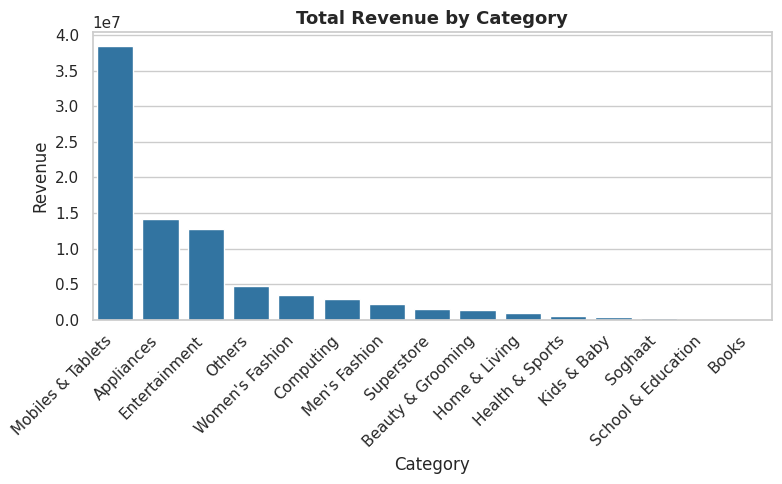

In [41]:
#visualisasi barplot
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 5))

sns.barplot(
    data=revenue_by_category,
    x='category',
    y='revenue',
    color='#1f77b4'   # professional blue
)

plt.title('Total Revenue by Category', fontsize=13, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [42]:
summary_problem = {
    "total_revenue": final['revenue'].sum(),
    "total_customer": final['cust_id'].nunique(),
    "total_orders": final['order_id'].nunique(),
    "discount_orders": final[final['used_discount']=='Discount']['order_id'].nunique(),
    "non_discount_orders": final[final['used_discount']=='No Discount']['order_id'].nunique()
}

summary_problem

{'total_revenue': np.float64(84251512.76479001),
 'total_customer': 42087,
 'total_orders': 92550,
 'discount_orders': 37974,
 'non_discount_orders': 56753}

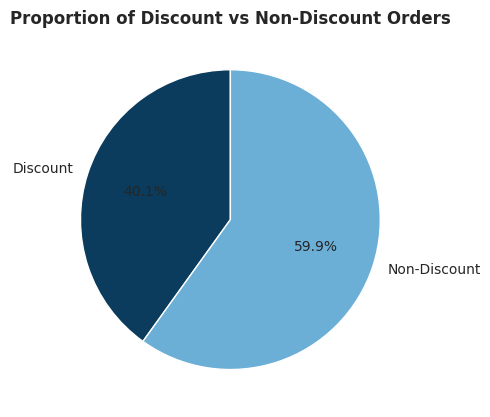

In [48]:
sns.set_theme(style="whitegrid")

# Hitung jumlah order
discount_summary = (
    final.groupby('used_discount')['order_id']
         .nunique()
         .reset_index(name='total_orders')
)

plt.figure(figsize=(5,5))

colors = ['#0B3C5D', '#6BAED6']  # navy & biru hambar

plt.pie(
    discount_summary['total_orders'],
    labels=['Discount', 'Non-Discount'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 10}
)

plt.title('Proportion of Discount vs Non-Discount Orders',
          fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Number of Orders')

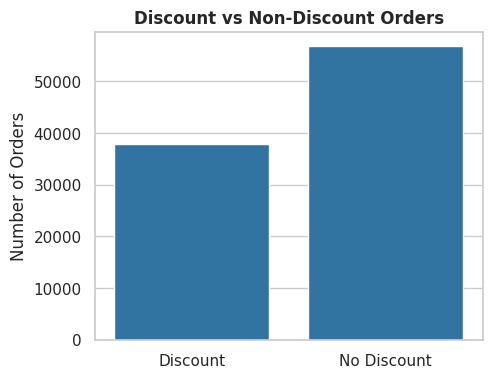

In [47]:
sns.set_theme(style="whitegrid")

# Hitung jumlah order
discount_summary = (
    final.groupby('used_discount')['order_id']
      .nunique()
      .reset_index(name='total_orders')
)

plt.figure(figsize=(5,4))

sns.barplot(
    data=discount_summary,
    x='used_discount',
    y='total_orders',
    color='#1f77b4'
)

plt.title('Discount vs Non-Discount Orders', fontsize=12, fontweight='bold')
plt.xlabel('')
plt.ylabel('Number of Orders')

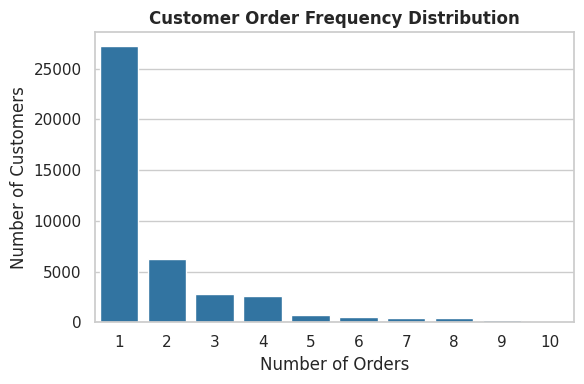

In [45]:
# Hitung jumlah customer per total_orders
order_freq_dist = (
    order_per_customer
    .groupby('total_orders')
    .size()
    .reset_index(name='num_customers')
)

# Batasi sampai 10 order (biar tidak noisy)
order_freq_dist = order_freq_dist[order_freq_dist['total_orders'] <= 10]

sns.set_theme(style="whitegrid")

plt.figure(figsize=(6,4))

sns.barplot(
    data=order_freq_dist,
    x='total_orders',
    y='num_customers',
    color='#1f77b4'
)

plt.title('Customer Order Frequency Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

In [37]:
#simpan dataset final for dashboard
final_dashboard.to_csv('final_dashboard.csv', index=False)

{'total_revenue': np.float64(84251512.76479001),
 'total_customer': 42087,
 'total_orders': 92550,
 'discount_orders': 37974,
 'non_discount_orders': 56753}



# After Segmentasi RFM

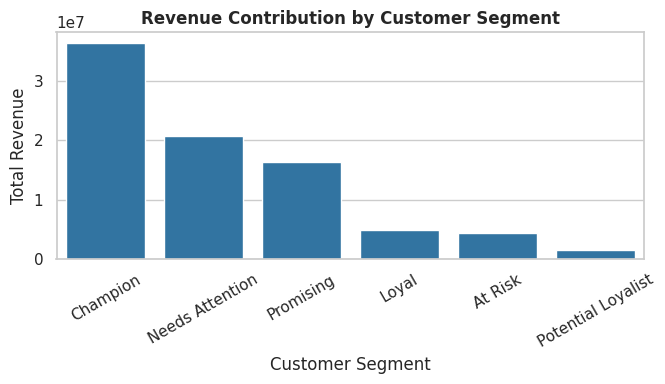

In [49]:
#Revenue tiap segment
sns.set_theme(style="whitegrid")

revenue_by_segment = (
    final_dashboard
    .groupby('segment')['revenue']
    .sum()
    .reset_index()
    .sort_values(by='revenue', ascending=False)
)

plt.figure(figsize=(7,4))
sns.barplot(
    data=revenue_by_segment,
    x='segment',
    y='revenue',
    color='#1f77b4'
)

plt.title('Revenue Contribution by Customer Segment', fontsize=12, fontweight='bold')
plt.xlabel('Customer Segment')
plt.ylabel('Total Revenue')
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

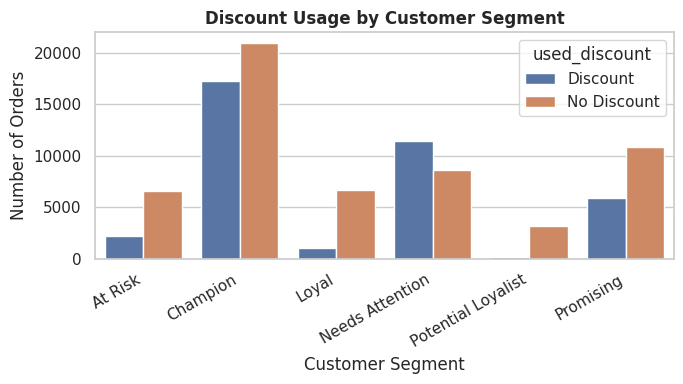

In [54]:
discount_by_segment = (
    final_dashboard
    .groupby(['segment', 'used_discount'])['order_id']
    .nunique()
    .reset_index(name='total_orders')
)

plt.figure(figsize=(7,4))

sns.barplot(
    data=discount_by_segment,
    x='segment',
    y='total_orders',
    hue='used_discount'
)

plt.title('Discount Usage by Customer Segment', fontweight='bold')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Orders')
plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.show()

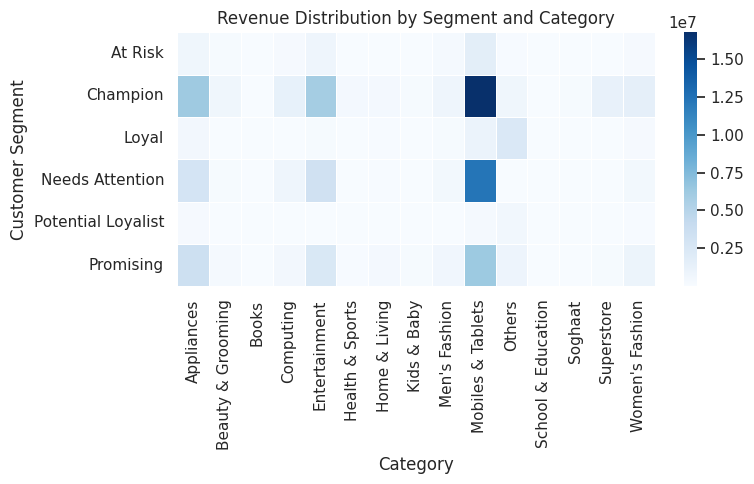

In [55]:
segment_category = (
    final_dashboard
    .groupby(['segment', 'category'])['revenue']
    .sum()
    .reset_index()
)

pivot_segment_category = segment_category.pivot(
    index='segment',
    columns='category',
    values='revenue'
)

plt.figure(figsize=(8,5))

sns.heatmap(
    pivot_segment_category,
    cmap='Blues',
    linewidths=0.5
)

plt.title('Revenue Distribution by Segment and Category')
plt.xlabel('Category')
plt.ylabel('Customer Segment')

plt.tight_layout()
plt.show()

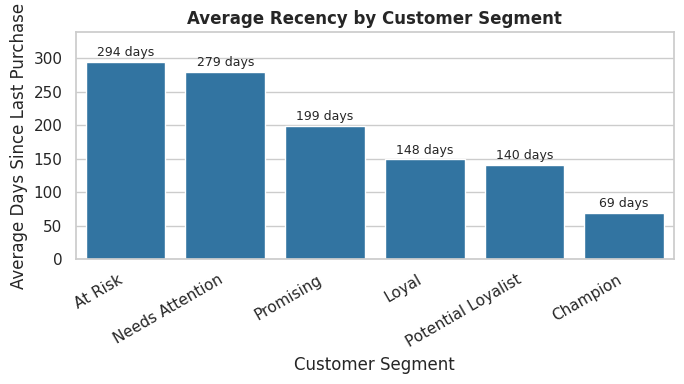

In [60]:
sns.set_theme(style="whitegrid")

# Hitung average recency per segment
recency_by_segment = (
    final_dashboard
    .groupby('segment')['recency']
    .mean()
    .reset_index()
    .sort_values(by='recency', ascending=False)
)

plt.figure(figsize=(7,4))

ax = sns.barplot(
    data=recency_by_segment,
    x='segment',
    y='recency',
    color='#1f77b4'
)

plt.title('Average Recency by Customer Segment', fontweight='bold')
plt.xlabel('Customer Segment')
plt.ylabel('Average Days Since Last Purchase')
plt.xticks(rotation=30, ha='right')

# 🔹 Tambahkan padding sumbu Y (INI KUNCINYA)
y_max = recency_by_segment['recency'].max()
ax.set_ylim(0, y_max * 1.15)

# 🔹 Tambahkan label (lebih rapat & rapi)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{int(height)} days',
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='bottom',
        fontsize=9,
        xytext=(0, 2),
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()
